## - CRISP-DM Data Science Process
## - Exploratory Data Analysis (EDA)
## - Data Preparation

## 1- CRoss Industry Standard Process for Data Mining (CRISP-DM) 
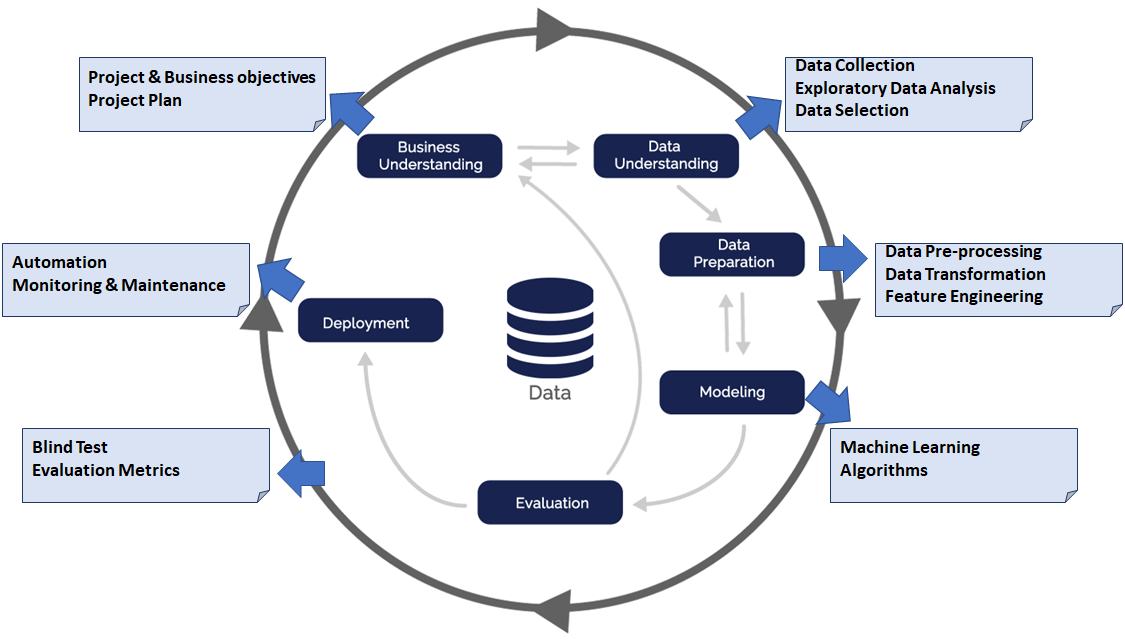

### Standard Machine Learning Project Pipeline
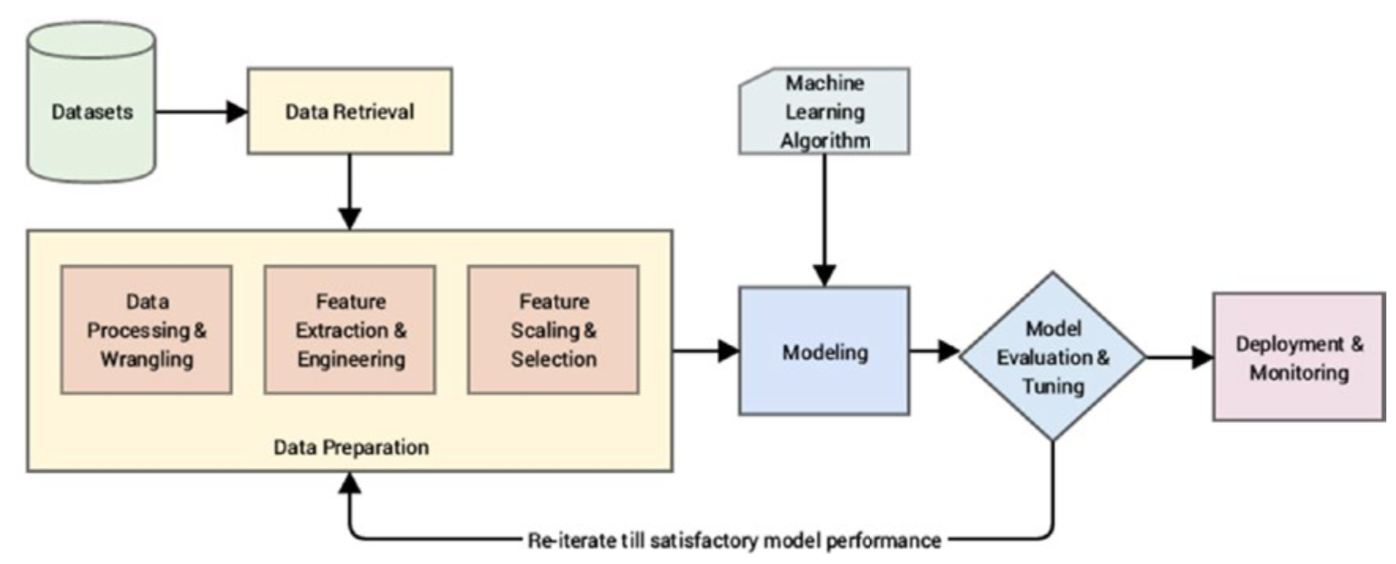

## 2- Exploratory Data Analysis (EDA)

### - Gain a better understanding of data
### - Assess  the quality of data 
### - Extract important variables and their relationships
### - Summarize main characteristics by visualization, descriptive statistics, etc.


In [3]:
# Working with Real Data "California Housing Prices dataset" (https://www.kaggle.com/camnugent/california-housing-prices)

# Importing libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Loading the dataset into a dataframe


# dataset's shape (n_obervations and n_features)


# Show the first 5 observations (rows)


housing's shape :  (20640, 10)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

### (Q1): What is the project objective? 

In [ ]:
#  Checking the types of data


### (Q2): By observing the obtained result, what can we conclude? 

In [ ]:
# Checking the missing values

# print

In [ ]:
# Get the descriptive statistics



### (Q3): By observing the obtained result, what can we conclude ? 

### (Q4): What operations should be applied in data preparation ? 

In [ ]:
#  Get the duplicate rows 




### (Q5): By observing the obtained result, what can we conclude? 

In [ ]:
#  Find out the unique value of the selected column


# Get count of each category


### (Q6): What operation should be applied for this feature in data preparation? 

In [ ]:
# Get categorical features


### (Q7): How to get numerical features (hint: np.number)

In [ ]:
# Get numerical features

### Quartiles

Quartiles are the values that divide a list of ordered numbers into quarters: 
(1) Put the list of numbers in order;
(2) Then cut the list into four equal parts; 
(3) The Quartiles are at the "cuts"
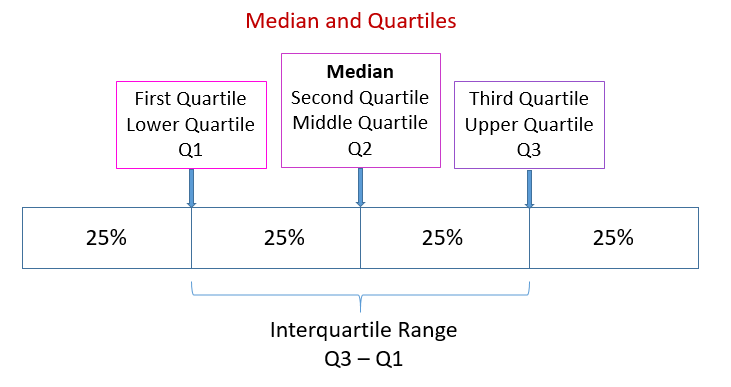
### (Q8): What is InterQuartile Range? 

### Outlier detection from Inter-Quartile Range

### (1) Find out the interquartile range IQR = Q3-Q1;
### (2) Choose a multiplier, K, typically equal to 1.5;
### (3) Any data point which is less than Q1–1.5 IQR or Q3+1.5 IQR is an outlier. 

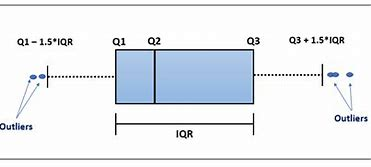

In [ ]:
def outlier_detection(df, variable):
    

    return outliers

#outliers = outlier_detection(housing, 'total_bedrooms')
#print("Number of outliers = ", len(outliers))

In [ ]:
## Visualization of histograms of numerical features

#housing.hist(bins=50, figsize=(20,15))
plt.show()

### (Q9): By observing these histograms, what can we conclude? 

### (Q10): What operations should be applied in data preparation ? 

+ `housing_median_age` and `median_house_value` are limited to maximal values. 
=> The ML algorithm can't be trained on  `median_house_value` > 500000 USD. 
=> The ML model shooould be evaluated only for `median_house_value` <= 500000 USD.
+ Feature have different scales. 
==> Feature scaling with standardization.
+ Some features have heavy tailed (`kurtosis`: a measure of the tailedness) et skewed (`skewness` : a measure of asymmetry) distributions.
==>  Transform theses distributions (with `PowerTransformer`) for more performant ML models.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html

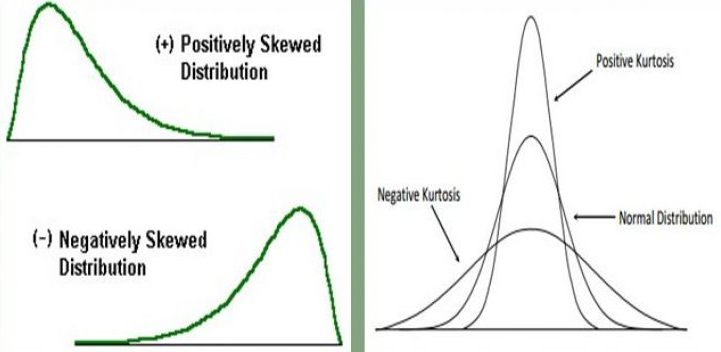


In [ ]:
# Compute `skewness` of features
num_features = housing.select_dtypes(include=[np.number]).columns
skewness = housing[num_features].skew()
print(skewness)

In [ ]:
# Compute `kurtosis` of features
kurtosis = housing[num_features].kurtosis()
print(kurtosis)

In [ ]:
# Extract insights by visualization
# `alpha' : density of points
# `s` = size of a point is propotional to 'population'
# 'c' = color of a point is propotional to 'median_house_value' (colormap = 'jet' : from blue to red)
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/100., 
             label='population', figsize=(10, 7), c='median_house_value', cmap=plt.get_cmap(name='jet'), colorbar=True)
plt.legend()

### (Q11): By observing this figure, what can we conclude? 

In [ ]:
# Correlation or dependence (in [-1,1]) is a statistical relationship between two random variables. 
# If two variables are correlated then the variation of one variable affects the variation of the other variable.

# Compute correlation betwwen `population` and `median_house_value` :
housing[['population', 'median_house_value']].corr()

In [ ]:
# Correlation between numerical variables : a symmetric 10x10 matrix


In [ ]:
# Correlation of target variable `'median_house_value` with other variables
#corr_matrix['median_house_value'].sort_values(ascending=False)

### (Q13): By observing this result, what can we conclude? 

### Correlations between two variables
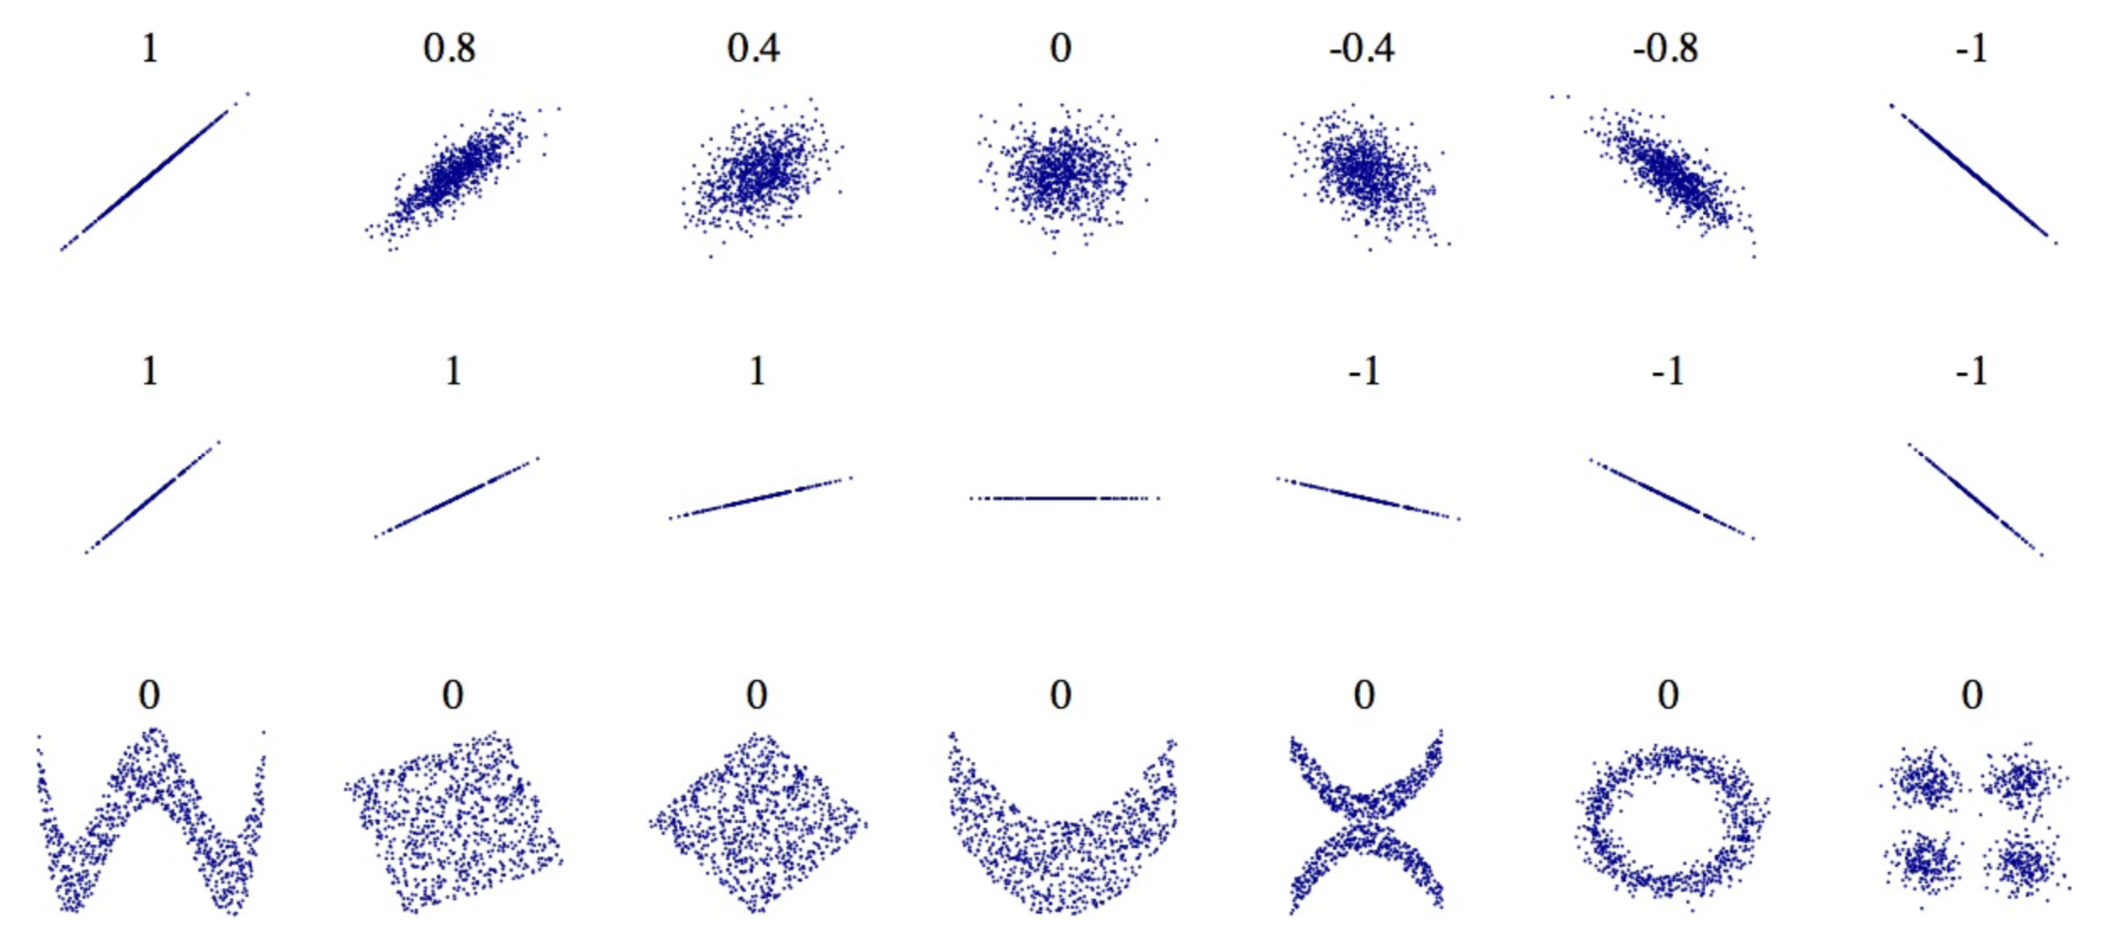

In [ ]:
from pandas.plotting import scatter_matrix
# the 3 more correlated features to 'median_house_value'
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(frame=housing[attributes], figsize=(12, 8))
plt.show()

In [ ]:
# ==> The most important feature for `median_house_value` prediction is `median_income`
housing.plot(kind='scatter', x='median_income', y='median_house_value', figsize=(12,8), alpha=0.1)
plt.show()

## 3- Data Preparation
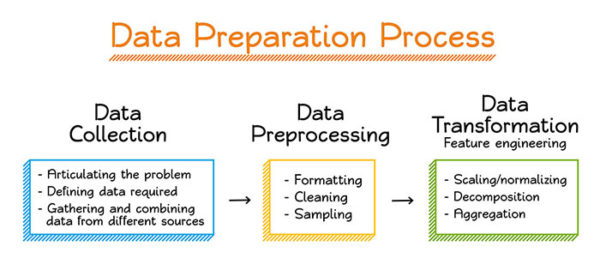

# Data Preparation for Structured Data
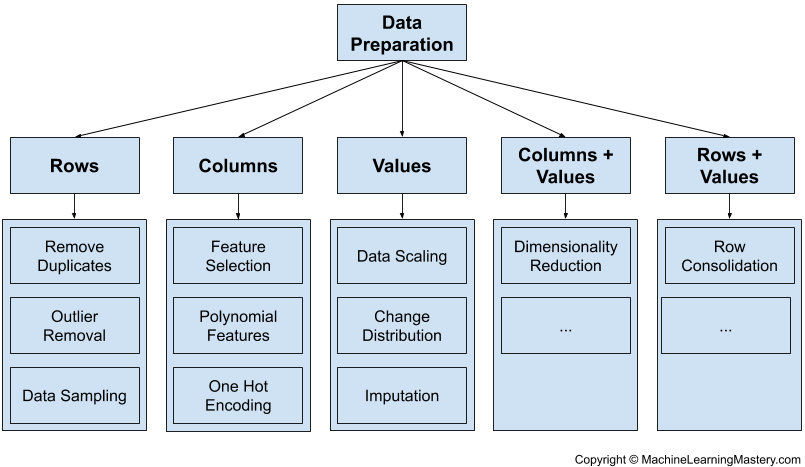

### Data Preparation of Housing Dataset
+ Dropping duplicated observations if they exist.
+ Feature Engineering : derive new features by combining some other features.
+ Dropping highly correlated features (abs(corr)>0.98).
+ Spliting the dataset into training and test sets.
+ Handling missing values.
+ Transformating distributions and scaling features.
+ Encoding the categorical feature.

In [ ]:
# Drop duplicates
housing = housing.drop_duplicates()

# Feature Engineering : feature combination
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

# drop 'total_bedrooms' because it's highly correlated to households (corr = 0.98) : 
# ==> 'total_bedrooms' gives the same information as households
# corr('total_bedrooms','median_house_value') =  0.049686 < 
# corr('households','median_house_value') =  0.065843 ==> drop 'total_bedrooms' 
      
housing.drop(['total_bedrooms'], axis=1, inplace=True)

# check the correlation 
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

### Train and Test Split  

+ Random split with the function `train_test_split`
+ $80\%$ training set
+ $20\%$ testing set
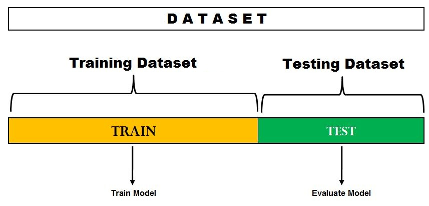

In [ ]:
from sklearn.model_selection import train_test_split

X = housing.drop("median_house_value", axis=1) # input variables (X is dataframe)
y = housing["median_house_value"].to_numpy() # output variable (y is an array)



X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2, shuffle=True,random_state=42)

print('X_train:', np.shape(X_train), 'X_test:', np.shape(X_test))

In [ ]:
# 3 options to handle missing values (nan, null) of `total_bedrooms`
#   + drop rows of missing values:
#   housing.dropna(subset='total_bedrooms')

#   + drop the feature 'total_bedrooms` :
#   housing.drop('total_bedrooms', axis=1)
     
#   + Impute with a value (0, mean, median, etc.)


In [ ]:
# Biuild a pre-processing pipeline that (1) imputes missing values, transforms distributions and scales numerical variables 
# (2) encode categorical variables

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
# Print numerical features
num_features = 
print(num_features)

# Print categorical features
cat_features = 
print(cat_features)

num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")), 
                         ("transformer", PowerTransformer(method='yeo-johnson', standardize=True))])

# full_pipeline applies num_pipeline on numerical variables and encodes categorical variables
full_pipeline = ColumnTransformer([("num", num_pipeline, num_features), ("cat", OneHotEncoder(), cat_features)])

In [ ]:
# Show the full-pipeline
print(full_pipeline)

In [ ]:
# train the full_pipeline on training data
full_pipeline = full_pipeline.fit(X_train)

# Apply full_pipeline on training and testing sets
X_train = full_pipeline.transform(X_train)
X_test = full_pipeline.transform(X_test)

print("\n X_train:", X_train.shape, "X_test:", X_test.shape)

In [ ]:
# To maximise reproducibility, we‘d like to use this pipeline repeatedly for our new incoming data. 
# Let’s save the pipeline by using ‘joblib’ package to save it as a pickle file.
import joblib
joblib.dump(full_pipeline, 'full_pipeline.pkl')

# Now we can call this pipeline, which includes all sorts of data preprocessing we need.
loaded_pipeline = joblib.load('full_pipeline.pkl')
print(loaded_pipeline)